# Section4: Assignments (20 pts- 15Mandatory/5Optional)


## Task A2.1: Hey Nano! What's the Temp? (5 points - Mandatory)

In this task, you should record the temperature data from Arduino nano RP2040. The frequency of the record is suggested to be 2 Hz (one every 0.5 seconds). Record the data for at least 2 minutes. To make the temperature vary a bit, do several "hot blow"s like "huh"s or "blows" on the board while recording the data. Save them into a CSV. Remember to Submit both CSV and your Python Code.

Note: You can use the EdgeImpulse online platform to record the data in JSON format and use [This Python Script](https://gist.github.com/ShawnHymel/35e38ce42d790704bcf6b2511039d4dc). to convert them into a CSV file. Or you can use a specific code in Arduino IDE. Your CSV file should look something like this:

```
Timestamps,Temperature
0.5,28.1
1,28.8
1.5,29.0
....
```

1. Collect the data in a CSV file and submit it with the rest of your results (2pts-Mandatory)

2. Visualize the data with a line graph with two axes: time & temperature with these criteria (1pt-Mandatory)

   - The color of the line should be **_orange_**
   - Add **_labels for each axes (Temperature (degrees Celsius), Time(seconds)),_**
   - Turn on the **_grids _**
   - Add **_legend on the top right corner - temperature_**

3. With the functions mentioned in the instruction above, write a code to **_delete rows with normal room temperature._**
   Delete the normal room temperature (28.1 for example) to turn ........./\............/\............/\....... to /\/\/\.
4. **_Visualize the data with the above criteria in a line graph (2pt-Mandatory)_**


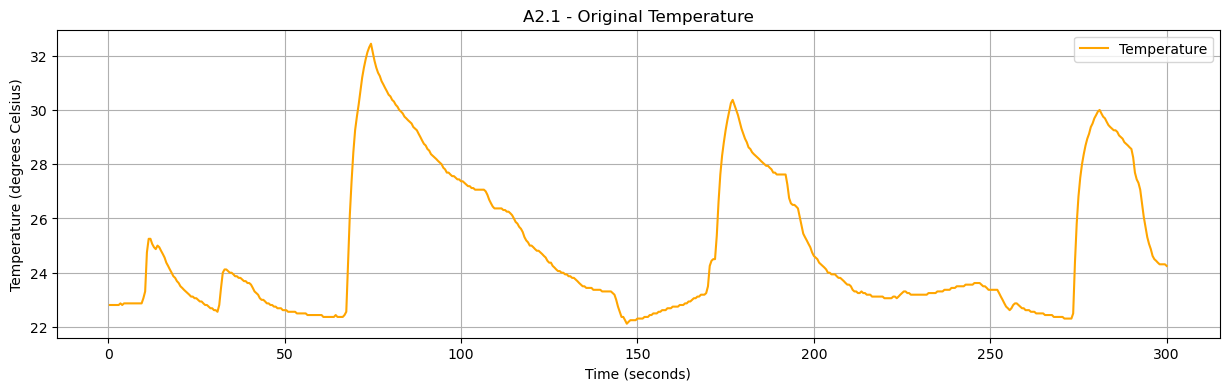

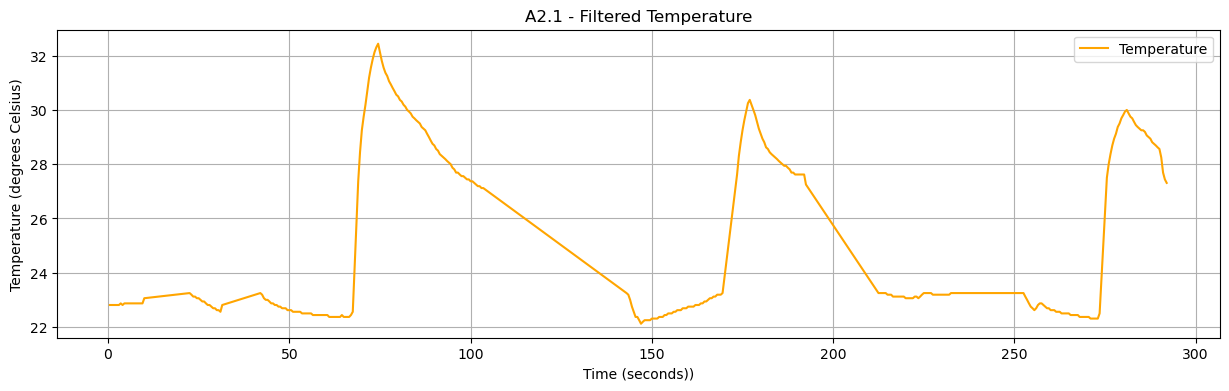

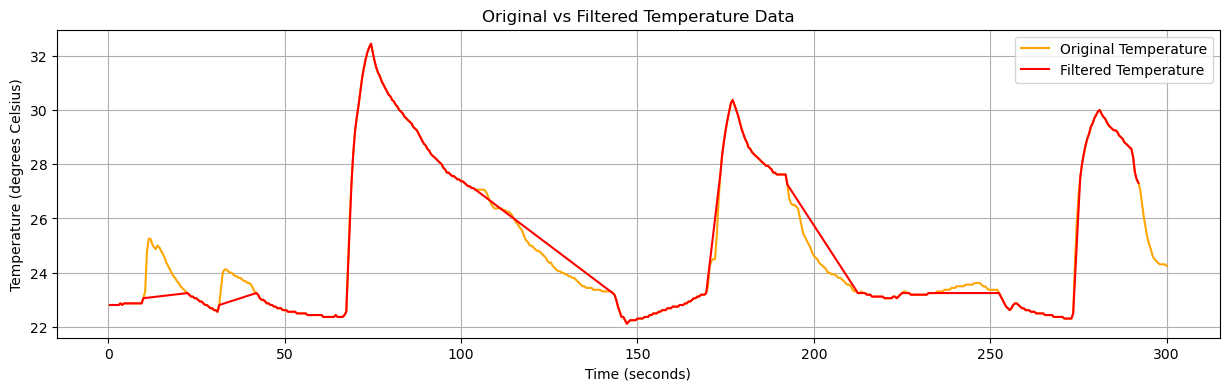

In [34]:
# Task: A2.1
# Author: Alex Oachesu
# Date: 6th of Feb, '24

import pandas as pd
import matplotlib.pyplot as plt

# 1. Collect the data in a CSV file and submit it with the rest of your results (2pts-Mandatory)
df = pd.read_csv("./data/A2_1/a2_1_temperature.csv")

# 2. Visualize the data with a line graph with two axes: time & temperature with these criteria (1pt-Mandatory)
plt.figure(figsize=(15, 4))
plt.plot(df["Timestamps"], df["Temperature"], color="orange", label="Temperature")
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (degrees Celsius)")
plt.title("A2.1 - Original Temperature")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# 3. With the functions mentioned in the instruction above,
# write a code to delete rows with normal room temperature.

# 3.1 Calculate the dataset's mean temperature
mean_temp = df["Temperature"].mean()

# 3.2 Define thresholds for lows and highs (adjust as needed)
low_threshold = mean_temp - 1.6
high_threshold = mean_temp + 2.2

# 3.3 Filter rows based on lows and highs
df_filtered = df[
    (df["Temperature"] < low_threshold) | (df["Temperature"] > high_threshold)
]

# Write the filtered data to a csv file
df_filtered.to_csv("./data/A2_1/a2_1_filtered_temp.csv", index=False)

# Visualize the filtered data with a line graph
plt.figure(figsize=(15, 4))
plt.plot(
    df_filtered["Timestamps"],
    df_filtered["Temperature"],
    color="orange",
    label="Temperature",
)
plt.xlabel("Time (seconds))")
plt.ylabel("Temperature (degrees Celsius)")
plt.title("A2.1 - Filtered Temperature")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

# Extra - visualize both original and filtered temperature data
plt.figure(figsize=(15, 4))
plt.plot(
    df["Timestamps"], df["Temperature"], color="orange", label="Original Temperature"
)
plt.plot(
    df_filtered["Timestamps"],
    df_filtered["Temperature"],
    color="red",
    label="Filtered Temperature",
)
plt.xlabel("Time (seconds)")
plt.ylabel("Temperature (degrees Celsius)")
plt.title("Original vs Filtered Temperature Data")
plt.legend()
plt.grid(True)
plt.show()

## Task A2.2: Freaking Frigid! (5 points- Mandatory)

This is a dataset of collecting in/out temperature data over 5 months in (appx. 97000 data rows): [Temperature Readings : IOT Devices](https://www.kaggle.com/datasets/atulanandjha/temperature-readings-iot-devices).

1. Visualize the indoor and outdoor temperature in one plot with different colors of your choice for the last week (strat from the top 02-12-2018 to 08-12-2018). (2 pts-Mandatory)

2. Do these modifications on the dataframe made from the CSV dataset: (3pts Mandatory)
   - Change the "In" and "Out" text of the "Out\In" column to 1 and 0 respectively.
   - Separate the date and time in the "noted_date" column, into two separate columns.
   - Keep only the data of the last day 08-12-2018, remove the rest of the rows with the appropriate function

Submit the modified CSV and your code together


Last week DataFrame tail:
                                       id  room_id/id          noted_date  \
6885  __export__.temp_log_173404_85aef0fb  Room Admin 2018-12-02 00:10:00   
6886  __export__.temp_log_173401_1097a0f5  Room Admin 2018-12-02 00:08:00   
6887  __export__.temp_log_173400_7b1e838d  Room Admin 2018-12-02 00:08:00   
6888  __export__.temp_log_173394_0312b549  Room Admin 2018-12-02 00:04:00   
6889  __export__.temp_log_173395_78f986f0  Room Admin 2018-12-02 00:04:00   

      temp out/in  
6885    35    Out  
6886    35    Out  
6887    35    Out  
6888    35    Out  
6889    35    Out  


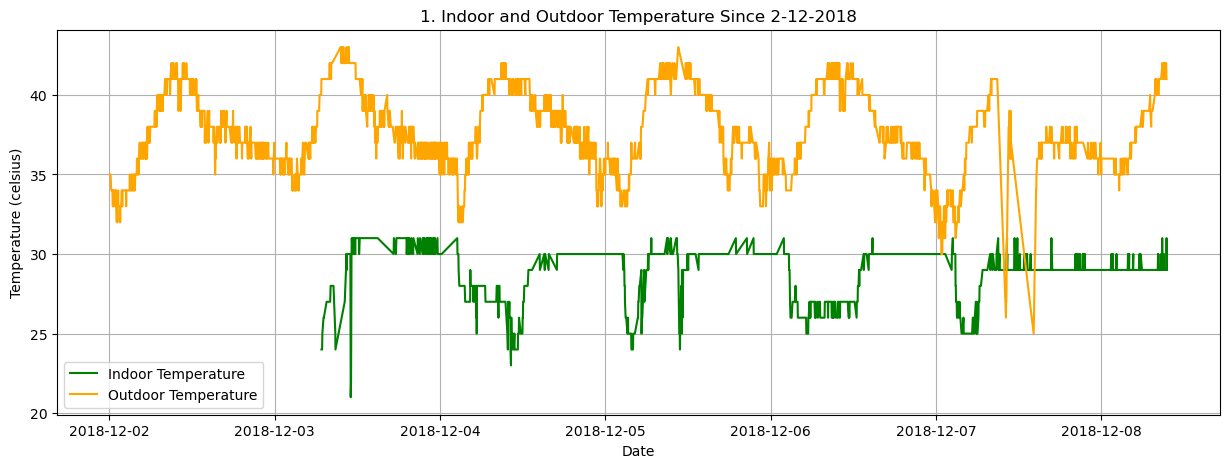

2.1 In/Out replaced by 1/0 
0        1
1        1
2        0
3        0
4        1
        ..
97601    1
97602    1
97603    1
97604    1
97605    1
Name: out/in, Length: 97606, dtype: int64

2.2-3 Modified DataFrame:
                                    id  room_id/id          noted_date  \
0  __export__.temp_log_196134_bd201015  Room Admin 2018-12-08 09:30:00   
1  __export__.temp_log_196131_7bca51bc  Room Admin 2018-12-08 09:30:00   
2  __export__.temp_log_196127_522915e3  Room Admin 2018-12-08 09:29:00   
3  __export__.temp_log_196128_be0919cf  Room Admin 2018-12-08 09:29:00   
4  __export__.temp_log_196126_d30b72fb  Room Admin 2018-12-08 09:29:00   

         Date      Time  temp  out/in  
0  2018-12-08  09:30:00    29       1  
1  2018-12-08  09:30:00    29       1  
2  2018-12-08  09:29:00    41       0  
3  2018-12-08  09:29:00    41       0  
4  2018-12-08  09:29:00    31       1  


In [84]:
# Task: A2.2
# Author: Alex Oachesu
# Date: 6th of Feb, '24

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("./data/A2_2/IOT-temp.csv")

# 1. Visualize indoor and outdoor temperature for the last week
# Convert 'noted_date' column to datetime format
df["noted_date"] = pd.to_datetime(df["noted_date"], format="%d-%m-%Y %H:%M")

# Filter the dataframe starting from 2-12-2018
starting_date = pd.to_datetime("2018-12-02")
df_last_week = df[df["noted_date"] >= starting_date].copy()
print("Last week DataFrame tail:")
print(df_last_week.tail())

# Visualize dataframe in a plot
plt.figure(figsize=(15, 5))
plt.plot(
    df_last_week[df_last_week["out/in"] == "In"]["noted_date"],
    df_last_week[df_last_week["out/in"] == "In"]["temp"],
    color="green",
    label="Indoor Temperature",
)
plt.plot(
    df_last_week[df_last_week["out/in"] == "Out"]["noted_date"],
    df_last_week[df_last_week["out/in"] == "Out"]["temp"],
    color="orange",
    label="Outdoor Temperature",
)
plt.xlabel("Date")
plt.ylabel("Temperature (celsius)")
plt.title("1. Indoor and Outdoor Temperature Since 2-12-2018")
plt.legend()
plt.grid(True)
plt.show()

# 2. Do these modifications on the dataframe made from the CSV dataset: (3pts Mandatory)
# 2.1 Change the "In" and "Out" text of the "Out\In" column to 1 and 0 respectively.
df["out/in"] = df["out/in"].replace({"In": 1, "Out": 0})
print("2.1 In/Out replaced by 1/0 ")
print(df["out/in"])

# 2.2 Separate the date and time in the "noted_date" column, into two separate columns.
df.loc[:, "Date"] = pd.to_datetime(df["noted_date"]).dt.date
df.loc[:, "Time"] = pd.to_datetime(df["noted_date"]).dt.time

# Move the "Date" and "Time" columns after the "noted_date" column
# Get the index of the "noted_date" column
noted_date_index = df.columns.get_loc("noted_date")
# Move the "Date" column after "noted_date"
df.insert(noted_date_index + 1, "Date", df.pop("Date"))
# Move the "Time" column after "Date"
df.insert(noted_date_index + 2, "Time", df.pop("Time"))

# 2.3 Keep only the data of the last day 08-12-2018
df_last_day = df[df["Date"] == pd.to_datetime("2018-12-08").date()]
df_last_day.to_csv("./data/A2_2/last-day.csv", index=False)
print("\n2.2-3 Modified DataFrame:")
print(df_last_day.head())

## Task A2.3: Digital Health IoT dataset (7 points - Mandatory/Optional)

### Dataset #1:

A sample of 46 participants using an Apple Watch and a "FitBit" app for 65 minutes for 46 participants. This data was collected as part of a Harvard dataset (6265 rows): [Apple Watch and Fitbit data](https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data)., there are three files inside archive. We will be focusing on "aw_fb_data"

1. Based on the instruction on the distribution transformation, transform the "calories" column to take the shape of a distribution close to normal distribution. The current distribution looks something like the below figure. Experiment with different transforms (log, cube, etc.) to find the right one. (1pts - Mandatory)

2. As mentioned before, the data reflects 46 participants. Make a copy of the original dataframe and Find a way to keep one sample from each participant. Therefore, the new dataframe should have 46 rows. You should use a specific function or a mix of functions in the instruction. Afterward, visualize the "age", "height", and "weight" of the participants on each subplot (stacked plot). Grids should be on, Legends should be on top, and The color of the line plot for each subplot should be different. (2pts - Optional)

3. Visualize "steps", "heart_rate", and "calories" of the first three participants in three plots with subplots (stacked plot), in a way that the steps of each three participants are depicted with different colored lines, the same for other two datasets. The legends should be on the top corner of each plot (participant #1, participant #2, participant#3) (2pts - Mandatory)

4. Normalize the "age", "height", and "weight", and Standardize "steps" and "height rate" columns in a separate column at the end of the dataframe (1pts - Mandatory)

5. Split the dataset into three categories with the following distribution: Train (70%), Validation (15%), and Test (15%) (1pts - Mandatory)

Submit both the CSV file and your code.


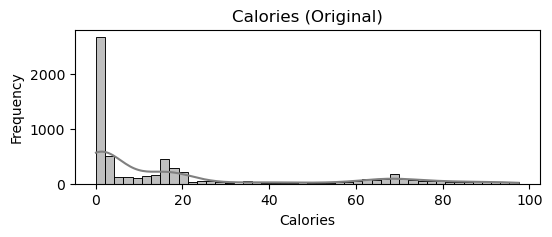

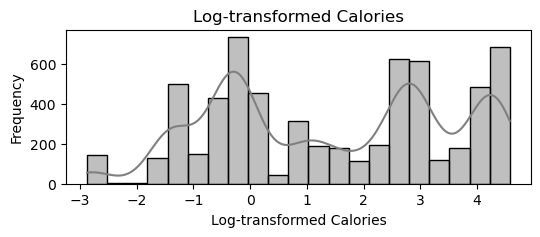

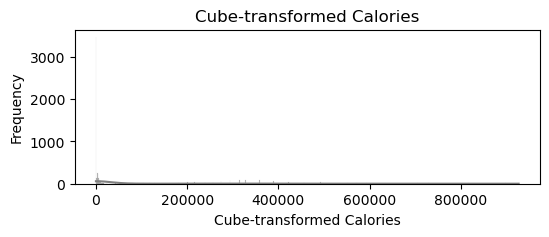

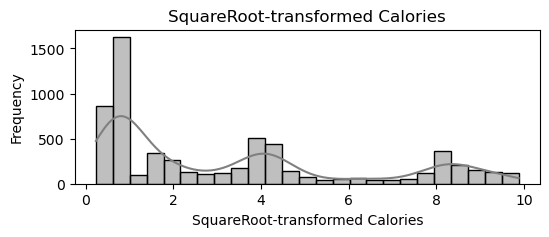

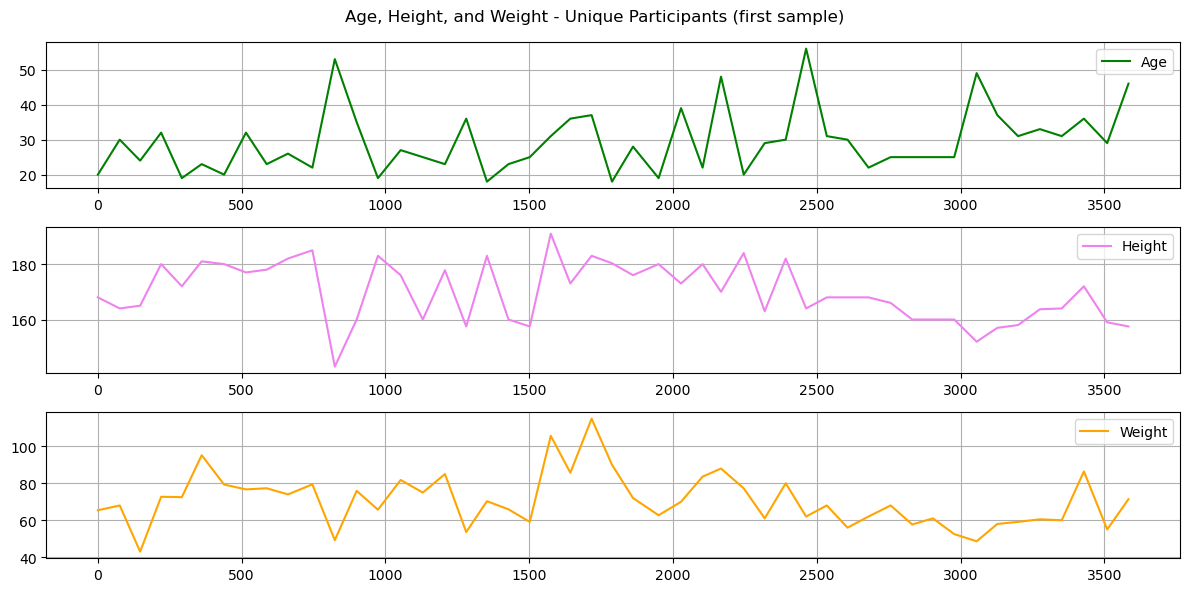

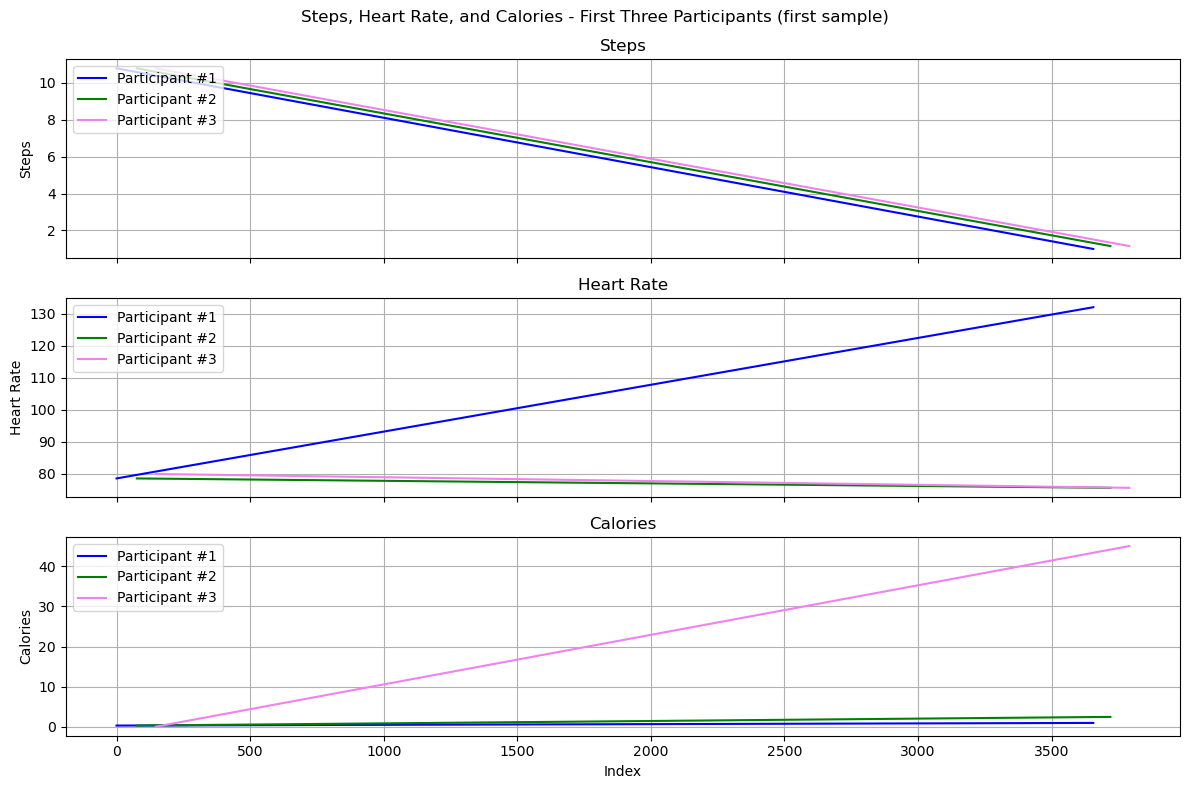

       Set  Size
     Train  4384
Validation   940
      Test   940


In [186]:
# Task: A2.3
# Author: Alex Oachesu
# Date: 6th of Feb, '24

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("./data/A2_3/aw_fb_data.csv")

# Visualize the distribution of the original "calories"
plt.figure(figsize=(6, 2))
sns.histplot(df["calories"], kde=True, color="grey")
plt.title("Calories (Original)")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

# 1. Transform the "calories"
# Logarithm function can make a distribution more symmetric
# Apply log transformation to the "calories"
plt.figure(figsize=(6, 2))
sns.histplot(np.log(df["calories"]), kde=True, color="grey")
plt.title("Log-transformed Calories")
plt.xlabel("Log-transformed Calories")
plt.ylabel("Frequency")
plt.show()

# Apply cube transformation to the "calories"
plt.figure(figsize=(6, 2))
sns.histplot((df["calories"] ** 3), kde=True, color="grey")
plt.title("Cube-transformed Calories")
plt.xlabel("Cube-transformed Calories")
plt.ylabel("Frequency")
plt.show()

# Apply sqrt transformation to the "calories"
plt.figure(figsize=(6, 2))
sns.histplot(np.sqrt(df["calories"]), kde=True, color="grey")
plt.title("SquareRoot-transformed Calories")
plt.xlabel("SquareRoot-transformed Calories")
plt.ylabel("Frequency")
plt.show()

# 2. Keep one sample from each participant
df_copy = df.copy()
df_unique_participants = df_copy.drop_duplicates(subset=["height", "weight", "age"])
df_unique_participants.to_csv("./data/A2_3/unique_participants.csv", index=False)

# Visualize the "age", "height", and "weight" of the participants on stacked plot
fig, subplot = plt.subplots(3, 1, figsize=(12, 6))

# Plotting age
subplot[0].plot(
    df_unique_participants.index,
    df_unique_participants["age"],
    label="Age",
    color="green",
)
# Plotting height
subplot[1].plot(
    df_unique_participants.index,
    df_unique_participants["height"],
    label="Height",
    color="violet",
)
# Plotting weight
subplot[2].plot(
    df_unique_participants.index,
    df_unique_participants["weight"],
    label="Weight",
    color="orange",
)

# Adding grid and legend
for ax in subplot:
    ax.grid(True)
    ax.legend(loc="upper right")

plt.suptitle(
    "Age, Height, and Weight - Unique Participants (first sample)",
)
plt.tight_layout()
plt.show()

# 3. Visualize "steps", "heart_rate", and "calories" of the first three participants
# in three plots with subplots (stacked plot)
df_first_three = df_unique_participants.drop(df_unique_participants.index[3:]).copy()
df_first_three.to_csv("./data/A2_3/first_three.csv", index=False)

# Set colors for each of the three participants
participants_colors = ["blue", "green", "violet"]

# Set subtitles for each subplot
subplot_subtitle = ["Steps", "Heart Rate", "Calories"]

# Plot each participant's  "steps", "heart_rate", and "calories"
fig, subplot = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

for i, participant_id in enumerate(df_first_three["X1"]):
    participant_data = df[df["X1"] == participant_id]
    subplot[0].plot(
        participant_data.index,
        participant_data["steps"],
        label=f"Participant #{i + 1}",
        color=participants_colors[i],
    )
    subplot[1].plot(
        participant_data.index,
        participant_data["hear_rate"],
        label=f"Participant #{i + 1}",
        color=participants_colors[i],
    )
    subplot[2].plot(
        participant_data.index,
        participant_data["calories"],
        label=f"Participant #{i + 1}",
        color=participants_colors[i],
    )

# Set grid, y-label, and legend
for ax, attribute, subtitle in zip(
    subplot, ["Steps", "Heart Rate", "Calories"], subplot_subtitle
):
    ax.grid(True)
    ax.set_ylabel(attribute)
    ax.set_title(subtitle)
    ax.legend(loc="upper left")


# Set common xlabel and title
plt.xlabel("Index")
plt.suptitle(
    "Steps, Heart Rate, and Calories - First Three Participants (first sample)",
)
plt.tight_layout()
plt.show()

# 4.  Normalize the "age", "height", and "weight", and Standardize "steps" and "height rate" columns
# in a separate column at the end of the dataframe

# For Normalization - MinMaxScaler
# For Standardization - StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_norm_stand = df.copy()

# Normalize "age", "height", and "weight"
normalize = MinMaxScaler()
df_norm_stand[["age_norm", "height_norm", "weight_norm"]] = normalize.fit_transform(
    df_norm_stand[["age", "height", "weight"]]
)

# Standardize "steps" and "heart_rate"
standardize = StandardScaler()
df_norm_stand[["steps_std", "hear_rate_std"]] = standardize.fit_transform(
    df_norm_stand[["steps", "hear_rate"]]
)

df_norm_stand.to_csv("./data/A2_3/normalized_standardized.csv")

# 5. Split the dataset into three categories with the following distribution:
# Train (70%), Validation (15%), and Test (15%)

from sklearn.model_selection import train_test_split

# Split the original dataset into a 70% (train) and 30% (validation & test)
df_train, df_temp_test = train_test_split(df_norm_stand, test_size=0.3, random_state=5)

# Split the temporarily "test" into a training (50%) and a validation (50%) dfs
df_validation, df_test = train_test_split(df_temp_test, test_size=0.5, random_state=5)

# Evaluate the size of each of the sets
train_size = len(df_train)
validation_size = len(df_validation)
test_size = len(df_test)

# Create a DataFrame with the sizes
df_set_sizes = pd.DataFrame(
    {
        "Set": ["Train", "Validation", "Test"],
        "Size": [train_size, validation_size, test_size],
    }
)

df_set_sizes.to_csv("./data/A2_3/train_val_test_sets_dim.csv", index=False)
print(df_set_sizes.iloc[:, 0:].to_string(index=False))

## Task A2.4: Gone with the Wind! (3pts - Optional)

You are presented with a dataset of wind speed and the wind angle of the wind from a meteorological site. The problem is that some data while being so similar have values very differently. Angles are not ideal as model inputs since 360° and 0° should be in close proximity, smoothly transitioning. The direction becomes irrelevant when there is no wind blowing. (for example 0.1m/s at 359° is not represented well or the similarity of 10 m/s at 0.1° and 359.9°). The model will find it more straightforward to interpret if you transform the columns for wind direction and velocity into a wind vector (X and Y).

Download the weather dataset from here: [Climate2016.csv](https://mau.instructure.com/courses/16134/files/2498686?wrap=1)

We only focus on the columns "windvelo m/s" and "winddeg deg" which represent wind velocity and wind direction. See the data summary with the functions in the text to get the overview of the data

- Use mathematical functions to convert the Wind "speed&velocity" vector into two separate X & Y vectors. Add two more columns to your CSV file as windveloX and windveloY, and save your CSV file.
- Use the normalize function to normalize the data
- Use the "Hist2d" function to visualize the data before and after changes. It should look something like the two below figures

<img src="./images/hist2d_data_visualization.png" >

Submit both the CSV file and your code.


   windvelo (m/s)  winddeg (deg)
0            1.16          192.4
1            1.01          211.6
2            0.80          203.8
3            0.77          184.2
4            0.84          200.1
   windvelo (m/s)  winddeg (deg)  windveloX  windveloY
0        0.088186       0.534432   0.517104   0.474662
1        0.075707       0.587766   0.532561   0.453670
2        0.058236       0.566099   0.539832   0.469136
3        0.055740       0.511653   0.537794   0.489103
4        0.061564       0.555821   0.536608   0.471696


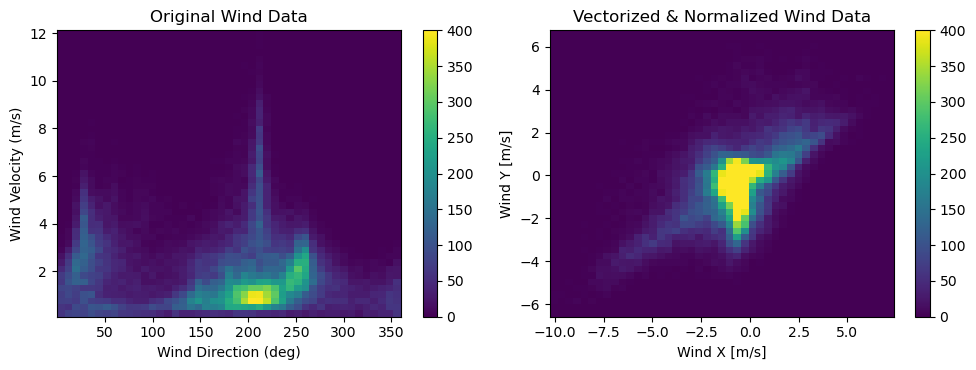

In [64]:
# Task: A2.4
# Author: Alex Oachesu
# Date: 6th of Feb, '24

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as norm

df = pd.read_csv("./data/A2_4/Climate2016.csv")

# Extract wind velocity and degree columns
df_filtered = df[["windvelo (m/s)", "winddeg (deg)"]].copy()

# Calculate WindVectors (X, Y), based on velocity and degree
df_wind_speed = df_filtered["windvelo (m/s)"].copy()
df_wind_degrees = df_filtered["winddeg (deg)"].copy()

# Convert the wind degrees into angles (radiants) to use trigonometry (sin, cos)
df_wind_radians = np.radians(df_wind_degrees)

# X component of a vector is `magnitude * cos(angle)`
# The magnitude is given by the wind speed
# The angle is given by the radians value
df_windveloX = df_wind_speed * np.cos(df_wind_radians)


# Y component of a vector is `magnitude * sin(angle)`
# The magnitude is given by the wind speed
# The angle is given by the radians value
df_windveloY = df_wind_speed * np.sin(df_wind_radians)

# Add two more columns to your CSV file as windveloX and windveloY,
# and save your CSV file
df["windveloX"] = df_windveloX
df["windveloY"] = df_windveloY
df.to_csv("./data/A2_4/Climate2016_vectorsXY.csv", index=False)

# Save the DataFrame containing the attributes of interest
# ("windvelo (m/s)", "winddeg (deg)", "windveloX", "windveloY")
print(df_filtered.head())
df_filtered["windveloX"] = df_windveloX
df_filtered["windveloY"] = df_windveloY
df_filtered.to_csv("./data/A2_4/Climate2016_vectorsXY_filtered.csv", index=False)

# Normalize the "windvelo (m/s)", "winddeg (deg)", "windveloX", "windveloY" values
df_filtered_normalized = df_filtered.copy()
df_filtered_normalized[
    ["windvelo (m/s)", "winddeg (deg)", "windveloX", "windveloY"]
] = norm().fit_transform(
    df_filtered_normalized[
        ["windvelo (m/s)", "winddeg (deg)", "windveloX", "windveloY"]
    ]
)
print(df_filtered_normalized.head())

# Use the "Hist2d" function to visualize the data before and after changes.
# The original data
df_wind_speed = df["windvelo (m/s)"].copy()
df_wind_dir = df["winddeg (deg)"].copy()

plt.figure(figsize=(10, 3.8))

# Plot for original wind data
plt.subplot(1, 2, 1)
plt.hist2d(
    df_wind_dir, df_wind_speed, bins=45, cmap="viridis", alpha=1, vmin=0, vmax=400
)
plt.colorbar()
plt.title("Original Wind Data")
plt.xlabel("Wind Direction (deg)")
plt.ylabel("Wind Velocity (m/s)")

# Plot for the vectorized and normalized wind data
plt.subplot(1, 2, 2)
plt.hist2d(
    df_windveloX, df_windveloY, bins=45, cmap="viridis", alpha=1, vmin=0, vmax=400
)
plt.colorbar()
plt.title("Vectorized & Normalized Wind Data")
plt.xlabel("Wind X [m/s]")
plt.ylabel("Wind Y [m/s]")

plt.tight_layout()
plt.show()